# Energy Dispatch Optimizer Notebook

### 1. Introduction

This notebook demonstrates how to use the `EnergyDispatchOptimizer` function, which uses solar irradiance and electricity prices to determine the optimal strategy for storing or selling photovoltaic energy using a battery system.


### 2. Required Imports

In [1]:
from OptiWatt import * # The rest of libraries and packages are already included in OptiWatt.py file

(CVXPY) Apr 21 06:54:31 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 21 06:54:31 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [22]:
# import cvxpy as cp (1.6.0)
# import numpy as np (1.26.4)
# import matplotlib.pyplot as plt (3.10.0)
# import requests (2.32.2)
# import pandas as pd (2.2.2)
# from datetime import datetime
# from zoneinfo import ZoneInfo
# import os
# import openmeteo_requests (1.4.0)
# import requests_cache (1.2.1)
# from retry_requests import retry (2.0.0)

### 3. Test the Function

#### Define Inputs

In [2]:
latitude = 40
longitude = -4
panel_azimuth = 180   # South-facing
panel_tilt = 30       # Typical optimal tilt
panel_size = 50       # in square meters
efficiency = 0.85
country_id = 3        # Spain
end_date = '2025-04-23T00'
S_max = 25000
S_init = 4500

# Optional parameters
both_ways = False
export = True
chart = True
S_newday = 4500

#### Run the Optimizer

Restricted license - for non-production use only - expires 2026-11-23


c:\Users\Usuario\Desktop\Projects\OptiWatt\OptiWatt.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['datetime'], rotation=90)
c:\Users\Usuario\Desktop\Projects\OptiWatt\OptiWatt.py:317: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['datetime'], rotation=90)


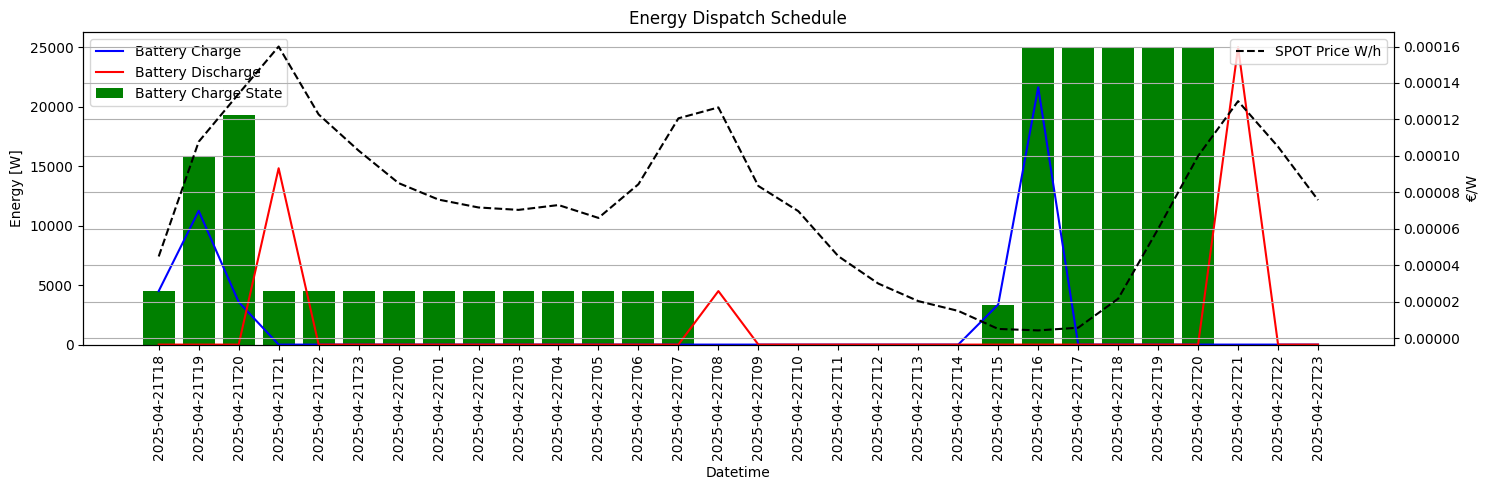

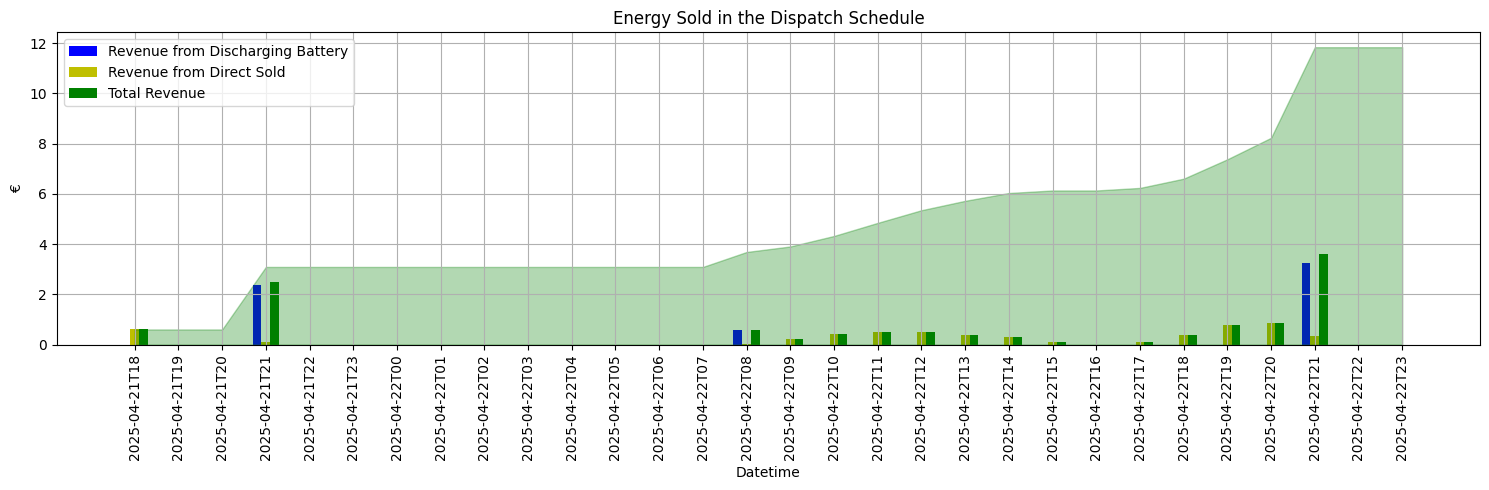

In [3]:
result = EnergyDispatchOptimizer(
    latitude=latitude,
    longitude=longitude,
    panel_azimuth=panel_azimuth,
    panel_tilt=panel_tilt,
    panel_size=panel_size,
    efficiency=efficiency,
    country_id=country_id,
    end_date=end_date,
    export=export,
    chart=chart,
    S_max=S_max,
    both_ways = both_ways,
    S_init=S_init,
    S_newday=S_newday
)

### 4. Explore the Results

If `chart=False`, you can inspect the raw result like so:


In [ ]:
if not chart:
    total_revenue, energy_sold, battery_state, battery_input, battery_output = result
    print("Total Revenue:", total_revenue)

### 5. Notes

- This function depends on Open-Meteo and ESIOS APIs for live solar and price data.
- GUROBI must be installed and properly licensed to solve the optimization problem.

---

> 📌 Make sure to adjust the `end_date` and panel parameters according to your testing goals.

> 🛠️ Troubleshooting: If you get a solver error or NoneType, try loosening constraints (increase `V_total_max` or `V_max` if inputed).
